# Metrics Heatmap

<a href="https://colab.research.google.com/github/netdata/netdata-community/blob/main/netdata-agent-api/netdata-pandas/metrics_heatmap.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will use the [netdata-pandas](https://github.com/netdata/netdata-pandas) Python package to pull some data from some demo Netdata servers and make some pretty looking heatmaps, because we all love a good heatmap don't we. 

**Note**: you can click the "Open in Colab" button above to open this notebook in [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true) where you can just get going with it without having to set up python enviornments or any messy stuff like that.

In [1]:
# if you need to, uncomment below to install netdata-pandas and seaborn packages
#!pip install plotly==4.14.1 netdata-pandas==0.0.33

In [2]:
import numpy as np
import pandas as pd
from netdata_pandas.data import get_data
import plotly.express as px

Lets pull some data for the last 15 minutes.

In [3]:
# inputs
hosts = ['london.my-netdata.io']
charts_regex = 'system.*'
before = 0
after = -60*15
resample_freq = '10s'

In [4]:
# get the data
df_raw = get_data(hosts=hosts, charts_regex=charts_regex, after=after, before=before, index_as_datetime=True)
print(df_raw.shape)
df_raw.head()

(900, 72)


,system.active_processes|active,system.cpu|guest,system.cpu|guest_nice,system.cpu|iowait,system.cpu|irq,system.cpu|nice,system.cpu|softirq,system.cpu|steal,system.cpu|system,system.cpu|user,...,system.softirqs|RCU,system.softirqs|SCHED,system.softirqs|TASKLET,system.softirqs|TIMER,system.softnet_stat|dropped,system.softnet_stat|flow_limit_count,system.softnet_stat|processed,system.softnet_stat|received_rps,system.softnet_stat|squeezed,system.uptime|uptime
time_idx,,,,,,,,,,,,,,,,,,,,,
2020-12-17 21:06:25,210.0,0.0,0.0,0.0,0.0,0.0,0.252525,0.000000,0.757576,0.757576,...,101.58501,98.31029,54.22580,136.64120,0.0,0.0,131.20632,0.0,0.0,67375190.0
2020-12-17 21:06:26,210.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.501253,1.503759,1.002506,...,101.62620,98.93034,56.95733,136.29142,0.0,0.0,140.58509,0.0,0.0,67375190.0
2020-12-17 21:06:27,210.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.017812,1.526718,...,93.26719,96.67964,57.36006,131.30436,0.0,0.0,128.94207,0.0,0.0,67375190.0
2020-12-17 21:06:28,210.0,0.0,0.0,0.0,0.0,0.0,0.249377,0.249377,1.246883,0.997506,...,93.68675,102.70726,56.29991,135.03062,0.0,0.0,135.73494,0.0,0.0,67375190.0
2020-12-17 21:06:29,210.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.259446,0.503778,...,97.68111,93.53471,49.60379,126.20384,0.0,0.0,121.82022,0.0,0.0,67375190.0


## Heatmaps!

In [5]:
# lets resample to 5 sec frequency
df = df_raw.resample(resample_freq).mean()

# lets min-max normalize our data so metrics can be compared on a heatmap
df=(df-df.min())/(df.max()-df.min())

# drop na cols
df = df.dropna(how='all', axis=1)

# lets sort cols by their std to try make heatmap prettier
df = df[df.std().sort_values(ascending=False).index]

print(df.shape)
df.head(10)

(91, 47)


,system.interrupts|qxl_11,system.ipv6|received,system.load|load15,system.cpu|steal,system.uptime|uptime,system.processes|blocked,system.load|load5,system.ram|free,system.entropy|entropy,system.ram|cached,...,system.softnet_stat|processed,system.softirqs|TASKLET,system.interrupts|virtio0-input.0_25,system.interrupts|virtio2-req.0_32,system.io|out,system.pgpgio|out,system.ram|buffers,system.forks|started,system.interrupts|virtio0-output.0_26,system.active_processes|active
time_idx,,,,,,,,,,,,,,,,,,,,,
2020-12-17 21:06:20,0.001192,0.072829,1.0000,0.000000,0.000000,1.0,0.850000,0.620024,0.114339,0.000000,...,0.141811,0.200634,0.203873,0.118731,0.947777,0.947617,1.0,0.019121,0.0,0.538462
2020-12-17 21:06:30,1.000000,0.453148,1.0000,0.017955,0.010022,1.0,0.850000,0.592610,0.139665,0.005770,...,0.105967,0.140606,0.143416,0.206858,0.903694,0.903542,0.0,0.009503,0.0,0.538462
2020-12-17 21:06:40,0.257551,0.249658,1.0000,0.300060,0.021158,1.0,0.825000,0.541783,0.173929,0.013837,...,0.128881,0.151170,0.154186,0.149299,0.851659,0.851403,0.0,0.009542,0.0,0.538462
2020-12-17 21:06:50,1.000000,0.060834,0.8750,0.176879,0.032294,1.0,0.800000,0.689130,0.209311,0.017310,...,0.159526,0.190992,0.191280,0.206895,0.903670,0.903518,0.0,0.047676,0.0,0.538462
2020-12-17 21:07:00,0.257551,0.235572,0.8750,0.377636,0.043430,1.0,0.750000,0.606676,0.242831,0.019981,...,0.000000,0.000000,0.000000,0.383102,0.870445,0.870264,0.0,0.009521,0.0,0.538462
2020-12-17 21:07:10,1.000000,0.768965,0.8750,0.285593,0.054566,1.0,0.725000,0.535534,0.278585,0.029811,...,0.184436,0.234488,0.241604,0.088136,0.867776,0.867775,0.0,0.009516,0.0,0.538462
2020-12-17 21:07:20,0.756480,0.745078,0.8750,0.048982,0.065702,1.0,0.700000,0.591820,0.310615,0.031520,...,0.200303,0.252358,0.259745,0.294985,0.903694,0.903542,0.0,0.009492,0.0,0.538462
2020-12-17 21:07:30,0.501071,0.946457,0.8125,0.093429,0.076837,1.0,0.650000,0.570777,0.347858,0.042472,...,0.355900,0.408960,0.402229,0.206858,0.881653,0.881504,0.0,0.104932,0.0,0.538462
2020-12-17 21:07:40,0.757736,0.726131,0.7500,0.026885,0.087973,1.0,0.622191,0.646654,0.383985,0.055508,...,0.264359,0.290781,0.287131,0.294985,0.749405,0.749278,0.0,0.009524,0.0,0.538462


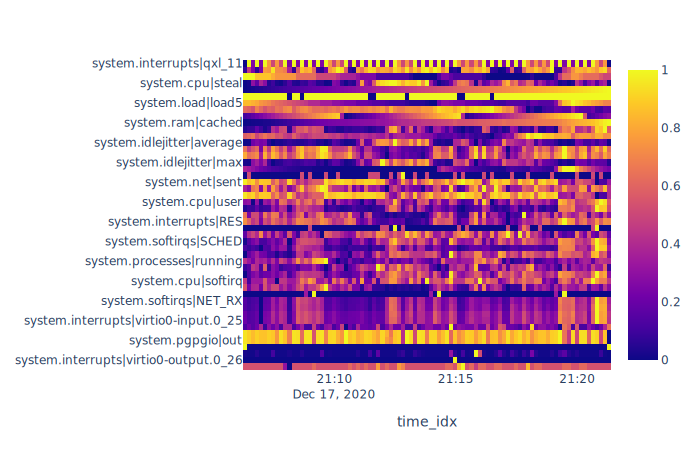

In [6]:
fig = px.imshow(df.transpose())
fig.update_layout(
    autosize=False,
    width=1000,
    height=1200)
# fig.show() # for interactive
fig.show("svg") # static svg so can be displayed on github, best use above line